# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Documentation on units: https://openweathermap.org/weather-data

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Build container variables for storing weather data
city_name = []
city_cloudiness = []
city_country = []
city_date = []
city_humidity = []
city_lat = []
city_lng = []
city_max_temp = []
city_wind_speed = []

# Store loop counting variables
city_count = 1
set_count = 1

In [4]:
# Use a loop to search for data on every city
for x in cities:
    
    response = requests.get(query_url + x)
    response_json = response.json()
    print(f"Processing Record {city_count} of Set {set_count} | {x}")
    
    if city_count % 50 == 0:
        city_count = 1
        set_count += 1
    else:
        city_count +=1
        
    try:
        city_cloudiness.append(response_json['clouds']['all'])
        city_country.append(response_json['sys']['country'])
        city_date.append(response_json['dt'])
        city_humidity.append(response_json['main']['humidity'])
        city_lat.append(response_json['coord']['lat'])
        city_lng.append(response_json['coord']['lon'])
        city_max_temp.append(response_json['main']['temp_max'])
        city_wind_speed.append(response_json['wind']['speed'])
        city_name.append(x)
    except:
        print("City not found. Skipping...")
        pass

Processing Record 1 of Set 1 | tsabong
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | burica
City not found. Skipping...
Processing Record 4 of Set 1 | lahaina
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | beloha
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | baker city
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1 | puerto ayo

Processing Record 39 of Set 4 | sao joao da barra
Processing Record 40 of Set 4 | lazaro cardenas
Processing Record 41 of Set 4 | barrow
Processing Record 42 of Set 4 | prado
Processing Record 43 of Set 4 | manta
Processing Record 44 of Set 4 | la ronge
Processing Record 45 of Set 4 | atasu
Processing Record 46 of Set 4 | aykhal
Processing Record 47 of Set 4 | matamoros
Processing Record 48 of Set 4 | nacala
Processing Record 49 of Set 4 | dunedin
Processing Record 50 of Set 4 | lompoc
Processing Record 1 of Set 5 | dickinson
Processing Record 2 of Set 5 | bonanza
Processing Record 3 of Set 5 | flinders
Processing Record 4 of Set 5 | alofi
Processing Record 5 of Set 5 | biak
Processing Record 6 of Set 5 | vestmannaeyjar
Processing Record 7 of Set 5 | moengo
Processing Record 8 of Set 5 | grindavik
Processing Record 9 of Set 5 | harper
Processing Record 10 of Set 5 | los llanos de aridane
Processing Record 11 of Set 5 | chegdomyn
Processing Record 12 of Set 5 | castro
Processing Record 

Processing Record 23 of Set 8 | morrope
Processing Record 24 of Set 8 | marsaxlokk
Processing Record 25 of Set 8 | mithimna
City not found. Skipping...
Processing Record 26 of Set 8 | kieta
Processing Record 27 of Set 8 | mehamn
Processing Record 28 of Set 8 | alice springs
Processing Record 29 of Set 8 | wufeng
Processing Record 30 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 31 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 32 of Set 8 | yatou
Processing Record 33 of Set 8 | canitas
City not found. Skipping...
Processing Record 34 of Set 8 | ipixuna
Processing Record 35 of Set 8 | aquiraz
Processing Record 36 of Set 8 | brae
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | sorvag
City not found. Skipping...
Processing Record 39 of Set 8 | illela
Processing Record 40 of Set 8 | tabarqah
City not found. Skipping...
Processing Record 41 of Set 8 | walvis bay
Processing Record 42 of Set 8 | mount gambier
Process

Processing Record 5 of Set 12 | sabibah
City not found. Skipping...
Processing Record 6 of Set 12 | matagami
Processing Record 7 of Set 12 | guiratinga
Processing Record 8 of Set 12 | talant
Processing Record 9 of Set 12 | ancud
Processing Record 10 of Set 12 | hami
Processing Record 11 of Set 12 | tsaratanana
Processing Record 12 of Set 12 | gazli
Processing Record 13 of Set 12 | fairbanks
Processing Record 14 of Set 12 | ruwi
Processing Record 15 of Set 12 | dalinghe
City not found. Skipping...
Processing Record 16 of Set 12 | skjervoy
Processing Record 17 of Set 12 | gimli
Processing Record 18 of Set 12 | tocopilla
Processing Record 19 of Set 12 | namibe
Processing Record 20 of Set 12 | maneromango
Processing Record 21 of Set 12 | jacareacanga
Processing Record 22 of Set 12 | waupun
Processing Record 23 of Set 12 | coahuayana
Processing Record 24 of Set 12 | bourail
Processing Record 25 of Set 12 | abu samrah
Processing Record 26 of Set 12 | braganca
Processing Record 27 of Set 12 |

In [5]:
print(len(city_name))
print(len(city_cloudiness))
print(len(city_country))
print(len(city_date))
print(len(city_humidity))
print(len(city_lat))
print(len(city_lng))
print(len(city_max_temp))
print(len(city_wind_speed))


527
527
527
527
527
527
527
527
527


In [6]:
weather_dict = {
    "City": city_name,
    "Cloudiness": city_cloudiness,
    "Country": city_country,
    "Date": city_date,
    "Humidity": city_humidity,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Wind Speed": city_wind_speed
}
weather_data = pd.DataFrame(weather_dict)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Export to csv
weather_data.to_csv("Output/weather_data.csv")

In [8]:
# Print the DataFrame header
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tsabong,12,BW,1585763262,40,-26.02,22.40,77.65,5.19
1,klaksvik,38,FO,1585763262,56,62.23,-6.59,42.80,34.45
2,lahaina,20,US,1585762984,82,20.88,-156.68,71.01,10.29
3,atuona,91,PF,1585763263,78,-9.80,-139.03,81.99,12.01
4,georgetown,40,MY,1585763007,88,5.41,100.34,82.40,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
# Get current time to print in plot titles
time_label = time.strftime("%Y-%m-%d")
#print(time_label)

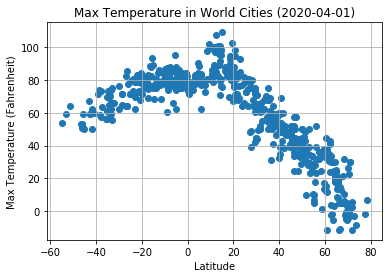

In [10]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_max_temp, marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature in World Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

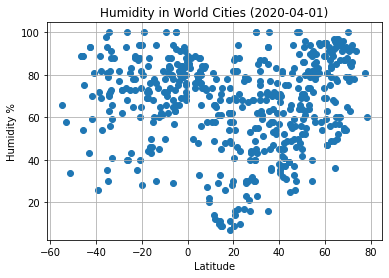

In [11]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_humidity, marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

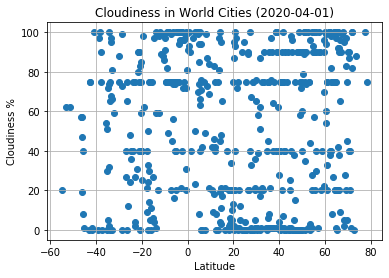

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

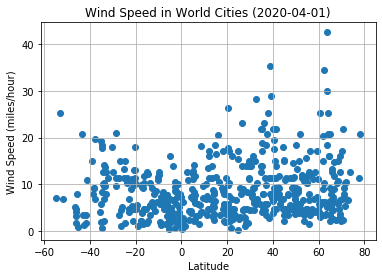

In [13]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_wind_speed, marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data[(weather_data.Lat >= 0)]
southern_df = weather_data[(weather_data.Lat < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

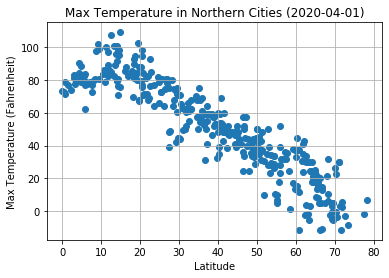

In [16]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature in Northern Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

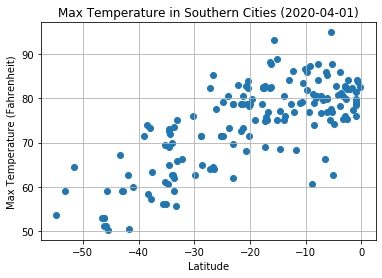

In [17]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature in Southern Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInSouthernCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

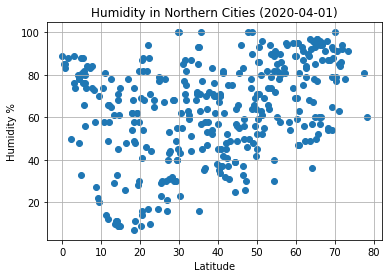

In [18]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df.Humidity, marker="o")

# Incorporate the other graph properties
plt.title("Humidity in Northern Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

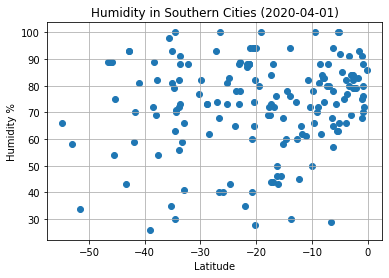

In [19]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df.Humidity, marker="o")

# Incorporate the other graph properties
plt.title("Humidity in Southern Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInSouthernCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

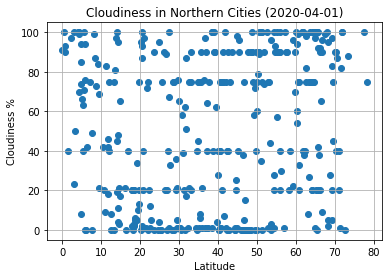

In [20]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df.Cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in Northern Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

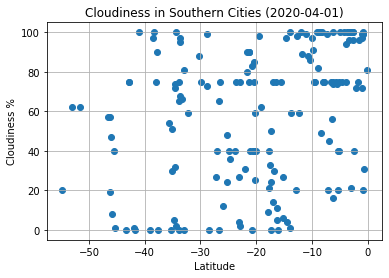

In [21]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df.Cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in Southern Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInSouthernCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

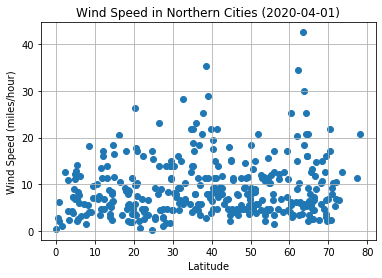

In [22]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in Northern Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

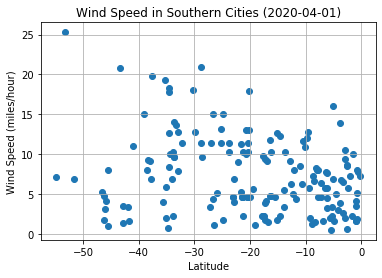

In [23]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in Southern Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInSouthernCities.png")

# Show plot
plt.show()